
Entrenamiento de modelos (mínimo 5 modelos supervisados diferentes y al menos 1 no supervisado) junto con su hiperparametrización, así como evaluación de los modelos (métricas de evaluación, interpretación de variables,...).



In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import pickle
import yaml
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [19]:
print(os.getcwd())
#df = pd.read_csv('C:/Users/silvi/Documents/DATA_SCIENCE/TheBridge - copia/DSPT2025-ML/Proyecto final/data/quejas-clientes.csv')
#df.head()
os.chdir(r"/content/sample_data/")
df_scaled= pd.read_csv("df_scaled.csv")


/content/sample_data


In [6]:
df_scaled.head()

,Product,Sub-product,Issue,Sub-issue,State,Company,Company response,ZIP code,Retraso envio dias,Timely response?
0,0.4,0.595238,0.261364,0.326087,0.862069,0.697326,0.8,0.761176,0.0,1
1,0.4,0.500000,0.272727,0.239130,0.862069,0.032616,0.2,0.774777,0.0,1
2,0.6,0.261905,0.079545,0.478261,0.396552,0.729289,0.2,0.021182,0.0,1
3,0.2,0.595238,0.715909,0.478261,0.120690,0.630789,0.8,0.925923,0.0,1
4,0.4,0.619048,0.272727,0.260870,0.689655,0.913894,0.8,0.430633,0.0,1


In [7]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28124 entries, 0 to 28123
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             28124 non-null  float64
 1   Sub-product         28124 non-null  float64
 2   Issue               28124 non-null  float64
 3   Sub-issue           28124 non-null  float64
 4   State               28124 non-null  float64
 5   Company             28124 non-null  float64
 6   Company response    28124 non-null  float64
 7   ZIP code            28124 non-null  float64
 8   Retraso envio dias  28124 non-null  float64
 9   Timely response?    28124 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.1 MB


ENTRENAMIENTO DE MODELOS

In [20]:
#SEPARACIÓN DE DATOS
#Separación entre variables explicativas y variable objetivo "Timely response?"
X =df_scaled.drop(["Timely response?"], axis = 1)
y=df_scaled["Timely response?"]

# Partición dejando un 75% para entrenar y un 25% de test.

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.25, random_state=42)

In [ ]:
X

,Product,Sub-product,Issue,Sub-issue,State,Company,Company response,ZIP code,Retraso envío días
0,0.4,0.595238,0.261364,0.326087,0.862069,0.697326,0.8,0.761176,0.000000
1,0.4,0.500000,0.272727,0.239130,0.862069,0.032616,0.2,0.774777,0.000000
2,0.6,0.261905,0.079545,0.478261,0.396552,0.729289,0.2,0.021182,0.000000
3,0.2,0.595238,0.715909,0.478261,0.120690,0.630789,0.8,0.925923,0.000000
4,0.4,0.619048,0.272727,0.260870,0.689655,0.913894,0.8,0.430633,0.000000
...,...,...,...,...,...,...,...,...,...
28119,0.4,0.595238,0.272727,0.239130,0.862069,0.318982,0.6,0.751995,0.015625
28120,0.1,1.000000,0.909091,0.478261,0.224138,0.299413,0.2,0.300370,0.093750
28121,0.6,0.142857,0.625000,0.478261,0.482759,0.754729,0.6,0.551015,0.015625
28122,0.8,0.595238,0.193182,0.478261,0.120690,0.589693,0.2,0.925093,0.093750


Como la variable objetivo tiene valores 0 ó 1 se van a aplicar modelos de CLASIFICACIÓN

**MODELOS SUPERVISADOS**

In [24]:
#REGRESIÓN LOGÍSTICA
# Crear el objeto SMOTE, debido al imbalanceo de clases que hay, le pongo 0.3 para no haya overfitting
smote = SMOTE(sampling_strategy=0.3, random_state=42)

# Crear pipeline con SMOTE y entrenar el modelo

# El pipeline asegura que el ajuste del modelo y la generación de muestras sintéticas sucedan en el orden correcto
log_reg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=42, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)
pipeline = Pipeline([('smote', smote), ('log_reg', log_reg)])

# Ajustar el modelo con el conjunto de entrenamiento balanceado
pipeline.fit(X_train, y_train)

# Predecir con el conjunto de prueba y evaluar
y_pred = pipeline.predict(X_test)

print("Regresión Logística:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Regresión Logística:
Accuracy: 0.9536339069833594
              precision    recall  f1-score   support

           0       0.28      0.57      0.37       169
           1       0.99      0.96      0.98      6862

    accuracy                           0.95      7031
   macro avg       0.63      0.77      0.67      7031
weighted avg       0.97      0.95      0.96      7031



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [26]:
# Guardo el modelo en un archivo .pkl
with open("regresion_logistica_supervisado.pkl", "wb") as f:
    pickle.dump(log_reg, f)

In [27]:
#ÁRBOL de DECISIÓN
# Crear el objeto SMOTE, debido al imbalanceo de clases que hay, le pongo 0.3 para no haya overfitting
smote = SMOTE(sampling_strategy=0.3, random_state=42)

# Crear pipeline con SMOTE y entrenar el modelo

dt = DecisionTreeClassifier()
pipeline = Pipeline([('smote', smote), ('dt', dt)])

# Ajustar el modelo con el conjunto de entrenamiento balanceado
pipeline.fit(X_train, y_train)

# Predecir con el conjunto de prueba y evaluar
y_pred = pipeline.predict(X_test)

print("Árbol de Decisión:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Árbol de Decisión:
Accuracy: 0.9698478168112644
              precision    recall  f1-score   support

           0       0.41      0.56      0.47       169
           1       0.99      0.98      0.98      6862

    accuracy                           0.97      7031
   macro avg       0.70      0.77      0.73      7031
weighted avg       0.97      0.97      0.97      7031



In [28]:
# Guardo el modelo en un archivo .pkl
with open("arbol_decision_supervisado.pkl", "wb") as f:
    pickle.dump(dt, f)

In [29]:
#KNN
# Crear el objeto SMOTE, debido al imbalanceo de clases que hay, le pongo 0.3 para no haya overfitting
smote = SMOTE(sampling_strategy=0.3, random_state=42)

# Crear pipeline con SMOTE y entrenar el modelo

knn = KNeighborsClassifier(n_neighbors=3)
pipeline = Pipeline([('smote', smote), ('knn', knn)])

# Ajustar el modelo con el conjunto de entrenamiento balanceado

pipeline.fit(X_train, y_train)

# Predecir con el conjunto de prueba y evaluar
y_pred = pipeline.predict(X_test)

print("KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


KNN:
Accuracy: 0.9544872706585124
              precision    recall  f1-score   support

           0       0.26      0.47      0.33       169
           1       0.99      0.97      0.98      6862

    accuracy                           0.95      7031
   macro avg       0.62      0.72      0.65      7031
weighted avg       0.97      0.95      0.96      7031



In [30]:
# Guardo el modelo en un archivo .pkl
with open("knn_supervisado.pkl", "wb") as f:
    pickle.dump(knn, f)

In [31]:
#NAIVE BAYES
# Crear el objeto SMOTE, debido al imbalanceo de clases que hay, le pongo 0.3 para no haya overfitting
smote = SMOTE(sampling_strategy=0.3, random_state=42)

# Crear pipeline con SMOTE y entrenar el modelo

nb = GaussianNB()
pipeline = Pipeline([('smote', smote), ('nb', nb)])

# Ajustar el modelo con el conjunto de entrenamiento balanceado

pipeline.fit(X_train, y_train)

# Predecir con el conjunto de prueba y evaluar
y_pred = pipeline.predict(X_test)


print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Naive Bayes:
Accuracy: 0.9034276774285308
              precision    recall  f1-score   support

           0       0.14      0.62      0.23       169
           1       0.99      0.91      0.95      6862

    accuracy                           0.90      7031
   macro avg       0.57      0.76      0.59      7031
weighted avg       0.97      0.90      0.93      7031



In [32]:
# Guardo el modelo en un archivo .pkl
with open("naive_bayes_supervisado.pkl", "wb") as f:
    pickle.dump(nb, f)

In [33]:
#XGBOOST
# Crear el objeto SMOTE, debido al imbalanceo de clases que hay, le pongo 0.3 para no haya overfitting
smote = SMOTE(sampling_strategy=0.3, random_state=42)
# Crear pipeline con SMOTE y entrenar el modelo

xgb_model = xgb.XGBClassifier()
pipeline = Pipeline([('smote', smote), ('xgb_model', xgb_model)])

# Crear y entrenar el modelo

pipeline.fit(X_train, y_train)

# Predecir con el conjunto de prueba y evaluar
y_pred = pipeline.predict(X_test)
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost:
Accuracy: 0.9874839994310909
              precision    recall  f1-score   support

           0       0.88      0.56      0.68       169
           1       0.99      1.00      0.99      6862

    accuracy                           0.99      7031
   macro avg       0.93      0.78      0.84      7031
weighted avg       0.99      0.99      0.99      7031



In [24]:
# Guardo el modelo en un archivo .pkl
with open("xgboost_supervisado.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

In [34]:
# RANDOM FOREST
# Crear el objeto SMOTE, debido al imbalanceo de clases que hay, le pongo 0.3 para no haya overfitting
smote = SMOTE(sampling_strategy=0.3, random_state=42)
# Crear pipeline con SMOTE y entrenar el modelo

RF=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=20, max_features='sqrt', max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=5, min_samples_split=10,min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1, oob_score=False, random_state=42, verbose=0,warm_start=False)
pipeline = Pipeline([('smote', smote), ('RF', RF)])
# Crear y entrenar el modelo

pipeline.fit(X_train, y_train)

# Predecir con el conjunto de prueba y evaluar
y_pred = pipeline.predict(X_test)

print("RF:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


RF:
Accuracy: 0.988479590385436
              precision    recall  f1-score   support

           0       0.95      0.55      0.70       169
           1       0.99      1.00      0.99      6862

    accuracy                           0.99      7031
   macro avg       0.97      0.77      0.85      7031
weighted avg       0.99      0.99      0.99      7031



In [44]:
# Guardo el modelo en un archivo .pkl
with open("Random_Forest_supervisado.pkl", "wb") as f:
    pickle.dump(RF, f)



Elijo RANDOM FOREST porque es el que da mejores valores en todo.

In [36]:
#RANDOM FOREST (REDUCIDO)

# IMPORTANCIA DE LAS CARACTERÍSTICAS
importancias = RF.feature_importances_

# Mostrar las características ordenadas por importancia
importancia_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importancias
}).sort_values(by="Importance", ascending=False)

In [38]:
importancia_df

,Feature,Importance
6,Company response,0.470998
0,Product,0.106655
8,Retraso envio dias,0.101604
3,Sub-issue,0.077594
2,Issue,0.070085
1,Sub-product,0.056127
5,Company,0.053792
7,ZIP code,0.034273
4,State,0.028873


In [39]:
#ZIP code y State parece que no tienen mucha importancia, podría quitarlas y ver si mejora el modelo de Random Forest
df_scaled_reducido = df_scaled.drop(columns=['ZIP code', 'State'])
df_scaled_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28124 entries, 0 to 28123
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             28124 non-null  float64
 1   Sub-product         28124 non-null  float64
 2   Issue               28124 non-null  float64
 3   Sub-issue           28124 non-null  float64
 4   Company             28124 non-null  float64
 5   Company response    28124 non-null  float64
 6   Retraso envio dias  28124 non-null  float64
 7   Timely response?    28124 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.7 MB


In [40]:
df_scaled_reducido.head()

,Product,Sub-product,Issue,Sub-issue,Company,Company response,Retraso envio dias,Timely response?
0,0.4,0.595238,0.261364,0.326087,0.697326,0.8,0.0,1
1,0.4,0.500000,0.272727,0.239130,0.032616,0.2,0.0,1
2,0.6,0.261905,0.079545,0.478261,0.729289,0.2,0.0,1
3,0.2,0.595238,0.715909,0.478261,0.630789,0.8,0.0,1
4,0.4,0.619048,0.272727,0.260870,0.913894,0.8,0.0,1


In [41]:
#Volvemos a hacer la DIVISIÓN de DATOS
X_reducido=df_scaled_reducido.drop(["Timely response?"], axis = 1)
y_reducido=df_scaled_reducido["Timely response?"]

In [42]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reducido, y_reducido, test_size=0.25, random_state=42)

In [43]:
# RANDOM FOREST REUUCIDO
# Crear el objeto SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)
# Crear pipeline con SMOTE y entrenar el modelo

#RF=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='sqrt', max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1, oob_score=False, random_state=42, verbose=0,warm_start=False)
RF=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=20, max_features='sqrt', max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=5, min_samples_split=10,min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1, oob_score=False, random_state=42, verbose=0,warm_start=False)
pipeline = Pipeline([('smote', smote), ('RF', RF)])
# Crear y entrenar el modelo

pipeline.fit(X_train_red, y_train_red)

# Predecir con el conjunto de prueba y evaluar
y_pred_red = pipeline.predict(X_test_red)

print("RF:")
print("Accuracy:", accuracy_score(y_test_red, y_pred_red))
print(classification_report(y_test_red, y_pred_red))

RF:
Accuracy: 0.9859194993599772
              precision    recall  f1-score   support

           0       0.81      0.54      0.65       169
           1       0.99      1.00      0.99      6862

    accuracy                           0.99      7031
   macro avg       0.90      0.77      0.82      7031
weighted avg       0.98      0.99      0.98      7031



Con la versión reducida la precisión para la clase minoritaria empeora, pasa de 0.95 a 0.81, así que no se pueden eliminar las dos variables que hemos quitado.


**MODELOS NO SUPERVISADOS**: de las 2 opciones que hay de modelos no supervisados (Clustering y Reducción de Dimensionalidad) voy a elegir Clustering y dentro de ahí, el K-means++ para que en vez de inicializar los centroides de manera aleatoria se haga a través de un algoritmo.

In [ ]:
#Cargo de nuevo el DataFrame df_scaled con los datos normalizados
df_scaled= pd.read_csv("df_scaled.csv")

In [ ]:
df_scaled

,Product,Sub-product,Issue,Sub-issue,State,Company,Company response,ZIP code,Retraso envío días,Timely response?
0,0.4,0.595238,0.261364,0.326087,0.862069,0.697326,0.8,0.761176,0.000000,1
1,0.4,0.500000,0.272727,0.239130,0.862069,0.032616,0.2,0.774777,0.000000,1
2,0.6,0.261905,0.079545,0.478261,0.396552,0.729289,0.2,0.021182,0.000000,1
3,0.2,0.595238,0.715909,0.478261,0.120690,0.630789,0.8,0.925923,0.000000,1
4,0.4,0.619048,0.272727,0.260870,0.689655,0.913894,0.8,0.430633,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
28119,0.4,0.595238,0.272727,0.239130,0.862069,0.318982,0.6,0.751995,0.015625,1
28120,0.1,1.000000,0.909091,0.478261,0.224138,0.299413,0.2,0.300370,0.093750,1
28121,0.6,0.142857,0.625000,0.478261,0.482759,0.754729,0.6,0.551015,0.015625,1
28122,0.8,0.595238,0.193182,0.478261,0.120690,0.589693,0.2,0.925093,0.093750,1


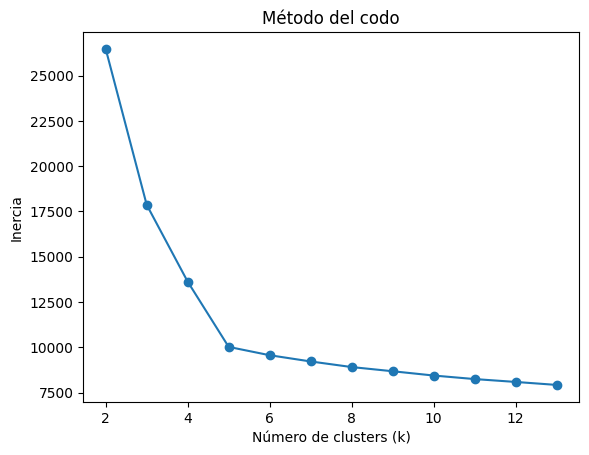

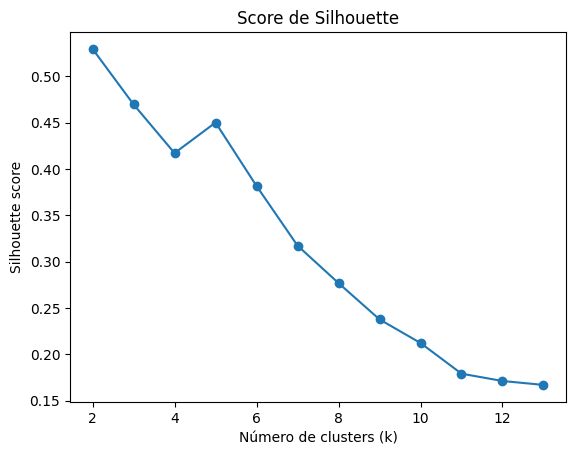

In [ ]:
#Usamos el método del codo y/o el silhouette score para decidir k, que es el número óptimo de clústers
inertias = []
silhouettes = []
K = range(2, 14)

for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_scaled, kmeans.labels_))

# Grafica método del codo
plt.plot(K, inertias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()

# Grafica silhouette score
plt.plot(K, silhouettes, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Score de Silhouette")
plt.show()

Con el método del codo se aprecia que la curva empieza a aplanarse a partir del k=5
El mejor k es aquel que maximiza el Silhouette Score, por tanto elijo k=5


In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
labels = kmeans.fit(df_scaled)

# Etiquetas de los clusters
df_scaled["Cluster"] = kmeans.labels_

# Centroides (en el espacio escalado)
centroides = kmeans.cluster_centers_


In [ ]:
print(df_scaled["Cluster"].value_counts())


Cluster
0    7774
1    6113
2    4824
4    4723
3    4690
Name: count, dtype: int64


In [ ]:
#Reducción de Dimensionalidad con PCA:
#Dado que los datos originales tienen 3 dimensiones, utilizamos PCA para reducirlos a 2 dimensiones, lo cual facilita la visualización en 2D.
pca = PCA(n_components=2)
df_scaled_pca = pca.fit_transform(df_scaled)


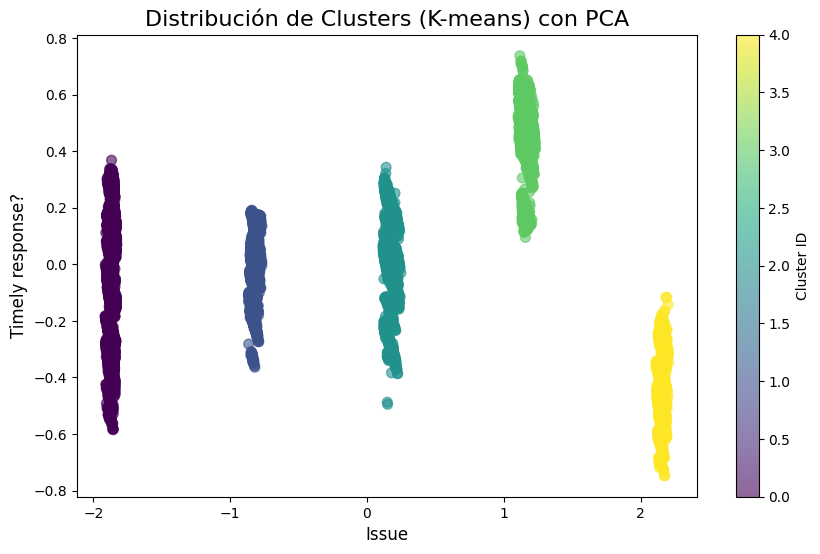

In [ ]:
# Graficar los resultados
plt.figure(figsize=(10, 6))

# Colorear los puntos según los clusters asignados
plt.scatter(df_scaled_pca[:, 0], df_scaled_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)

# Añadir título y etiquetas
plt.title('Distribución de Clusters (K-means) con PCA', fontsize=16)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('Timely response?', fontsize=12)

# Mostrar la leyenda con los colores de los clusters
plt.colorbar(label='Cluster ID')

# Mostrar la gráfica
plt.show()

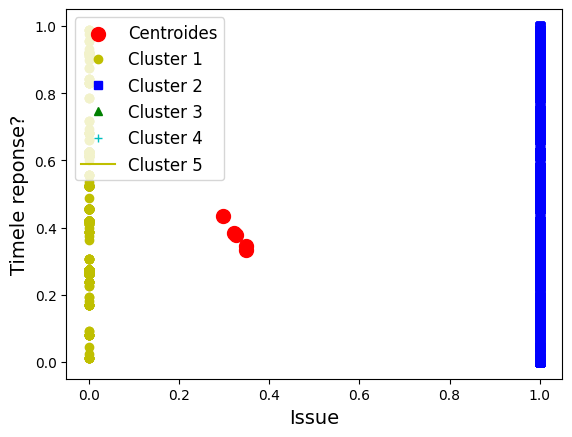

In [ ]:
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:, 0], s = 100, c = 'red', label = 'Centroides', zorder=1)

#Visualising the clusters
plt.plot(df_scaled.loc[y==0, 'Timely response?'], df_scaled.loc[y==0, 'Issue'], "yo", label="Cluster 1", zorder=-1)
plt.plot(df_scaled.loc[y==1, 'Timely response?'], df_scaled.loc[y==1, 'Issue'], "bs", label="Cluster 2", zorder=-1)
plt.plot(df_scaled.loc[y==2, 'Timely response?'], df_scaled.loc[y==2, 'Issue'], "g^", label="Cluster 3", zorder=-1)
plt.plot(df_scaled.loc[y==3, 'Timely response?'], df_scaled.loc[y==3, 'Issue'], "c+", label="Cluster 4", zorder=-1)
plt.plot(df_scaled.loc[y==4, 'Timely response?'], df_scaled.loc[y==4, 'Issue'], "y-", label="Cluster 5", zorder=-1)

plt.xlabel("Issue", fontsize=14)
plt.ylabel("Timele reponse?", fontsize=14)
plt.legend(loc="upper left", fontsize=12);

De todos los modelos entrenados, tanto supervisados como no supervisados el que mejor resultado me ha dado es RANDOM FOREST sin reducir.

In [29]:
#Saco el fichero de configuración YAML
# Ejemplo de configuración
config = {
    "modelo": "RandomForestClassifier",
    "n_estimators": 100,
    "max_depth": 5,
    "random_state": 42
}

# Guardar en YAML
with open("model_config.yaml", "w") as f:
    yaml.dump(config, f)
